In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import prince
from prince import plot
import seaborn as sns


In [2]:
data = pd.read_csv("insurance_data.csv",header=0)
reg_data = data.drop(columns=["_c39"])
reg_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


**Problématique :**
L'assurance automobile est un secteur où l'analyse des données peut être extrêmement bénéfique pour les compagnies d'assurance afin d'améliorer leur compréhension des risques, de mieux cibler leurs produits et de détecter les fraudes. Une problématique pertinente pour cette analyse pourrait être :

*"Comment les caractéristiques des assurés et les détails des incidents d'assurance automobile influencent-ils les réclamations d'assurance et la probabilité de fraude?"*

**Description des données :**
Les données comprennent des informations sur les assurés, leurs polices d'assurance et les incidents d'assurance automobile. Voici une brève description des variables :

- `months_as_customer` : Nombre de mois en tant que client de l'assurance.
- `age` : Âge du client.
- `policy_number` : Numéro de police d'assurance.
- `policy_bind_date` : Date à laquelle la police a été souscrite.
- `policy_state` : État où la police d'assurance est souscrite.
- `policy_csl` : Limite unique combinée de la police.
- `policy_deductable` : Franchise de la police.
- `policy_annual_premium` : Prime annuelle de la police.
- `umbrella_limit` : Limite parapluie de la police.
- `insured_zip` : Code postal de l'assuré.
- `insured_sex` : Sexe de l'assuré.
- `insured_education_level` : Niveau d'éducation de l'assuré.
- `insured_occupation` : Profession de l'assuré.
- `insured_hobbies` : Loisirs de l'assuré.
- `insured_relationship` : Relation de l'assuré avec le titulaire de la police.
- `capital-gains` : Plus-values de l'assuré.
- `capital-loss` : Pertes en capital de l'assuré.
- `incident_date` : Date de l'incident.
- `incident_type` : Type d'incident.
- `collision_type` : Type de collision.
- `incident_severity` : Gravité de l'incident.
- `authorities_contacted` : Autorités contactées après l'incident.
- `incident_state` : État où l'incident s'est produit.
- `incident_city` : Ville où l'incident s'est produit.
- `incident_location` : Emplacement spécifique de l'incident.
- `incident_hour_of_the_day` : Heure de la journée à laquelle l'incident s'est produit.
- `number_of_vehicles_involved` : Nombre de véhicules impliqués dans l'incident.
- `property_damage` : Dommages matériels survenus lors de l'incident.
- `bodily_injuries` : Blessures corporelles survenues lors de l'incident.
- `witnesses` : Témoins de l'incident.
- `police_report_available` : Disponibilité du rapport de police après l'incident.
- `total_claim_amount` : Montant total de la réclamation.
- `injury_claim` : Montant de la réclamation pour blessures corporelles.
- `property_claim` : Montant de la réclamation pour dommages matériels.
- `vehicle_claim` : Montant de la réclamation pour dommages de véhicule.
- `auto_make` : Marque de la voiture assurée.
- `auto_model` : Modèle de la voiture assurée.
- `auto_year` : Année de fabrication de la voiture assurée.
- `fraud_reported` : Indicateur de fraude signalée.

Ces données peuvent être utilisées pour analyser les tendances, les facteurs de risque et les modèles de fraude dans le domaine de l'assurance automobile.

L'indication selon laquelle la fraude a été signalée signifie que l'assureur a reçu des informations ou des preuves suggérant qu'une fraude a été commise dans le cas d'assurance automobile associé. Cela peut inclure divers types de fraude, tels que :

 - Exagération des réclamations : L'assuré pourrait exagérer les dommages subis lors de l'incident pour obtenir une indemnisation plus élevée que ce qui est légitimement dû.
 - Fabrication d'incidents : L'assuré pourrait inventer un incident qui ne s'est pas réellement produit afin de déposer une réclamation frauduleuse.
 - Fraude à l'assurance par collision : L'assuré pourrait intentionnellement provoquer un accident de voiture pour déposer une réclamation frauduleuse.
 - Fraude d'identité : L'assuré pourrait utiliser des informations d'identification frauduleuses pour souscrire une police d'assurance ou déposer une réclamation.

In [31]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_state                            1000 non-null   object 
 5   policy_csl                              1000 non-null   object 
 6   policy_deductable                       1000 non-null   int64  
 7   policy_annual_premium                   1000 non-null   float64
 8   umbrella_limit                          1000 non-null   int64  
 9   insured_zip                             1000 non-null   int64  
 10  insured_sex                             1000 non-null   objec

`Comment les caractéristiques des assurés et les détails des incidents d'assurance automobile sont-ils liés au montant total des réclamations ?`

`L'objectif de cette analyse est de comprendre comment les différentes caractéristiques des assurés, telles que l'âge, la prime annuelle de la police, les pertes en capital, ainsi que les détails des incidents d'assurance automobile, tels que le type d'incident, la gravité de l'incident, sont associés au montant total des réclamations. Nous cherchons à identifier les facteurs qui ont un impact significatif sur le montant des réclamations, afin de mieux comprendre les coûts associés aux réclamations d'assurance automobile et de développer des stratégies pour les gérer de manière efficace. En utilisant une approche de régression, nous visons à établir des relations quantitatives entre ces variables, ce qui nous permettra de prédire avec précision le montant total des réclamations en fonction des caractéristiques des assurés et des détails des incidents. Cette analyse peut également contribuer à la détection et à la prévention de la fraude en identifiant les schémas inhabituels ou frauduleux dans les réclamations d'assurance automobile.`

In [4]:
# Utiliser la fonction get_dummies de Pandas pour l'encodage one-hot des variables incident_type, incident_severity, incident_type et insured_sex
incident_type_encoded = pd.get_dummies(reg_data['incident_type'])
incident_severity_encoded = pd.get_dummies(reg_data['incident_severity'], prefix='incident_severity')
incident_type_encoded = pd.get_dummies(reg_data['incident_type'], prefix='incident_type')
insured_sex_encoded = pd.get_dummies(reg_data['insured_sex'], prefix='insured_sex')

# Joindre les données encodées à votre DataFrame d'origine
reg_data = pd.concat([reg_data, incident_type_encoded], axis=1)
reg_data = pd.concat([reg_data, insured_sex_encoded], axis=1)
reg_data = pd.concat([reg_data, incident_severity_encoded], axis=1)
reg_data = pd.concat([reg_data, incident_type_encoded], axis=1)
reg_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_number                           1000 non-null   int64  
 3   policy_bind_date                        1000 non-null   object 
 4   policy_state                            1000 non-null   object 
 5   policy_csl                              1000 non-null   object 
 6   policy_deductable                       1000 non-null   int64  
 7   policy_annual_premium                   1000 non-null   float64
 8   umbrella_limit                          1000 non-null   int64  
 9   insured_zip                             1000 non-null   int64  
 10  insured_sex                             1000 non-null   objec

In [26]:
# Sélectionner uniquement les variables quantitatives
quantitative_vars = reg_data.select_dtypes(include=['int64', 'float64','uint8'])

# Diviser les données en variables indépendantes (X) et dépendante (y)
X = quantitative_vars.drop(columns=["total_claim_amount","policy_number","insured_zip","injury_claim","property_claim","vehicle_claim"])
y = reg_data["total_claim_amount"]

# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajouter une constante à X_train et X_test pour estimer l'intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Créer le modèle de régression avec les données d'entraînement
model = sm.OLS(y_train, X_train)

# Ajuster le modèle aux données d'entraînement
results = model.fit()

# Prédire les valeurs de réclamation pour les données de test
y_pred = results.predict(X_test)

# Évaluer la performance du modèle
from sklearn.metrics import mean_squared_error, r2_score

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculer le coefficient de détermination (R²)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 207017069.14188302
R-squared: 0.688931080480449


In [6]:
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,insured_sex_FEMALE,insured_sex_MALE,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,1,1,0,0,0,0,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,1,0,1,0,0,0,0,0,1
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,1,0,0,1,0,0,1,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,1,0,1,0,0,0,0,0,1,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,1,0,1,0,0,0,0,0,1


In [27]:
# X_cart = reg_data.drop(columns=["total_claim_amount","policy_number","insured_zip","injury_claim","property_claim","vehicle_claim","policy_bind_date"])
reg_data_cart = reg_data.drop(columns=["policy_bind_date"])
reg_data_cart = pd.get_dummies(reg_data, drop_first=True)
X_cart = reg_data_cart.drop(columns=["total_claim_amount","policy_number","insured_zip","injury_claim","property_claim","vehicle_claim"])

In [28]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
X_cart_train, X_cart_test, y_cart_train, y_cart_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_cart_train, y_cart_train)

DecisionTreeRegressor()

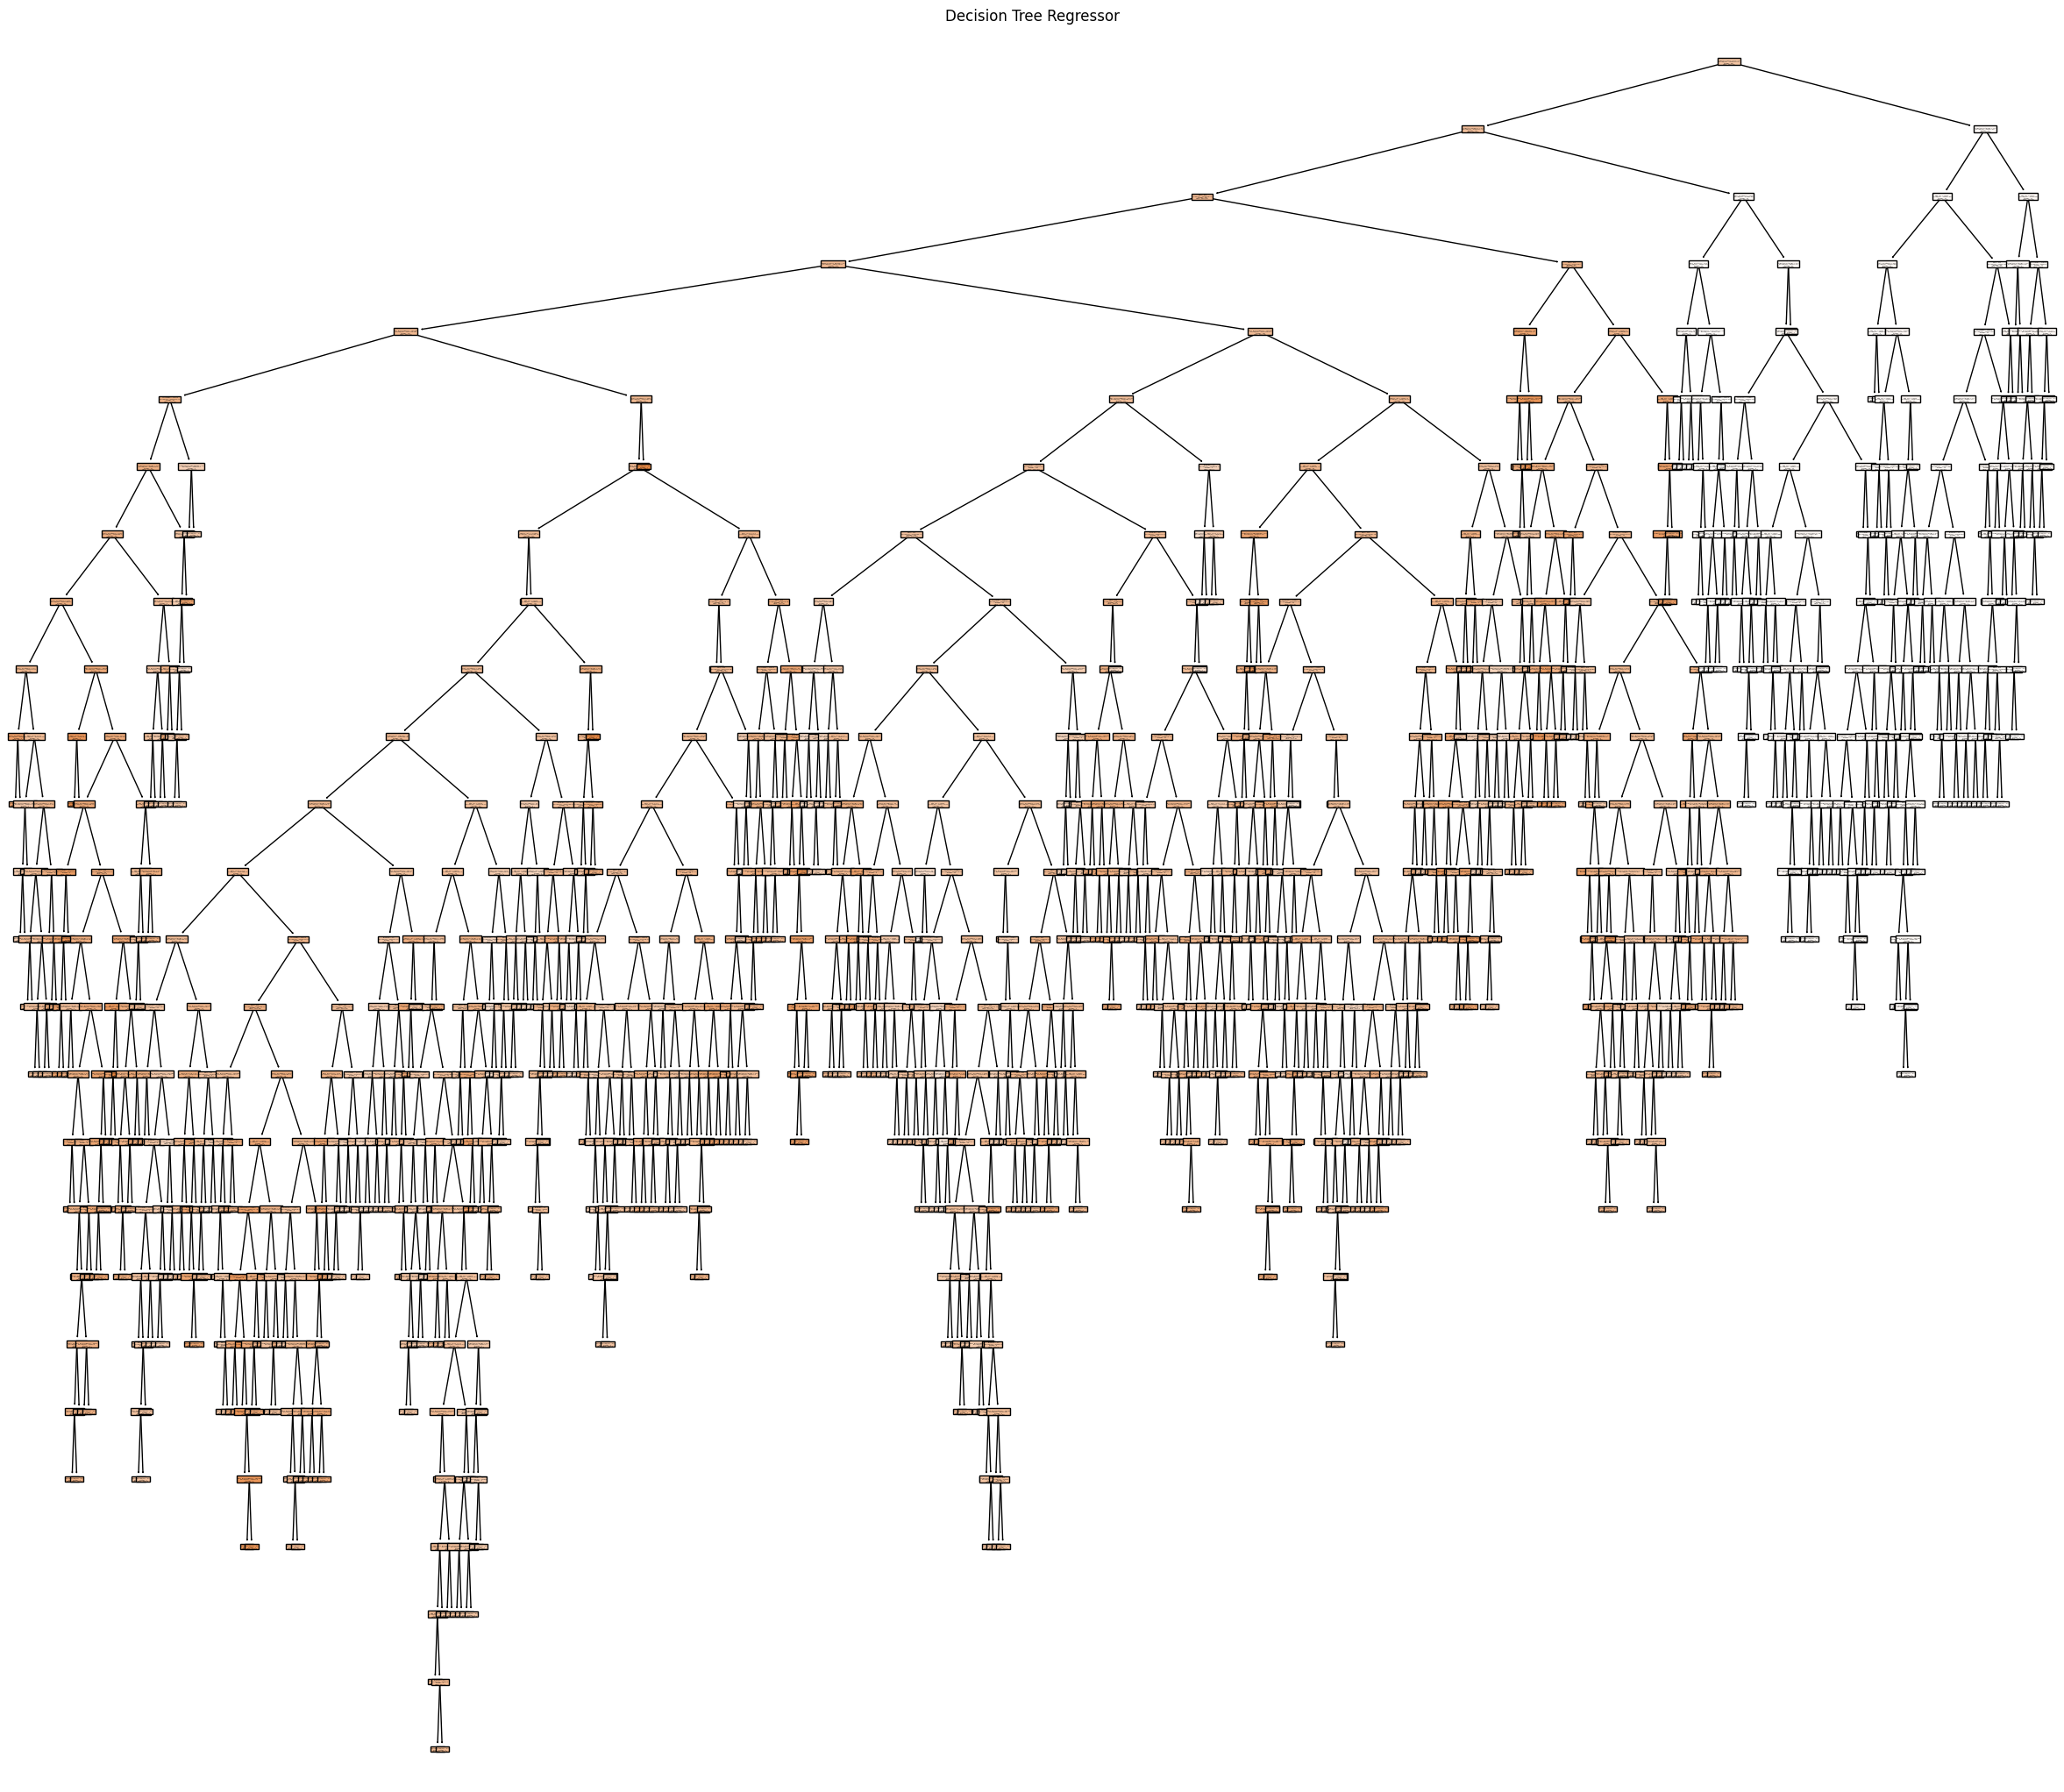

In [29]:
# Obtenir les noms des caractéristiques dans X
X_feature_names = X.columns.tolist()

# Plot decision tree for regression
plt.figure(figsize=(30, 26))
plot_tree(reg_tree, filled=True, feature_names=X_feature_names)
plt.title("Decision Tree Regressor")
plt.show()

In [30]:
y_pred_test = reg_tree.predict(X_cart_test)
mse_cart = mean_squared_error(y_cart_test, y_pred_test)

# Calculer le coefficient de détermination (R²)
r_squared_cart = r2_score(y_cart_test, y_pred_test)

print("Mean Squared Error (MSE):", mse_cart)
print("R-squared:", r_squared_cart)

Mean Squared Error (MSE): 409041741.0
R-squared: 0.38536385942137175


`Comment les différentes caractéristiques des assurés et des incidents d'assurance automobile sont-elles associées et quelles sont leurs implications sur le montant des réclamations d'assurance et la probabilité de fraude ?`

Problématique :
"L'analyse des correspondances multiples (ACM) permet d'explorer les relations complexes entre les variables qualitatives dans un ensemble de données d'assurance automobile. En étudiant la proximité entre les modalités des variables et en examinant les dimensions principales ainsi que leur contribution à l'inertie totale, nous cherchons à comprendre comment les différentes caractéristiques des assurés (telles que le niveau d'éducation, la relation avec le titulaire de la police, etc.) et les détails des incidents d'assurance (comme le type et la gravité de l'incident, etc.) influencent les réclamations d'assurance et la probabilité de fraude. En identifiant les associations entre les variables et en interprétant les proximités et les dimensions principales de l'ACM.

# ANALYSE DES CORRESPONDANCES MULTIPLES

## préparation des données

In [11]:
data_acm = data.loc[:, ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'incident_severity', 'incident_city', 'police_report_available', 'auto_make', 'fraud_reported']]

# Discrétisation de la variable total_claim_amount
# Définition des intervalles pour la discrétisation
bins = [0, 30000, 60000, 90000, 120000]  # Définissez les bornes des intervalles selon vos besoins
# Étiquettes pour les intervalles
labels = ['< 30k', '30k - 60k', '60k - 90k', '> 90k']  # Définissez les étiquettes pour chaque intervalle
# Discrétisation de la variable total_claim_amount
data_acm['claim_amount_category'] = pd.cut(data['total_claim_amount'], bins=bins, labels=labels)


## Application de la méthode mca

In [12]:
#Création de l'objet mca
mca = prince.MCA()
#Lancement de l'ACM sur le jeu de données
mca=mca.fit(data_acm)

Text(0, 0.5, 'Component 1 (2.68% inertia)')

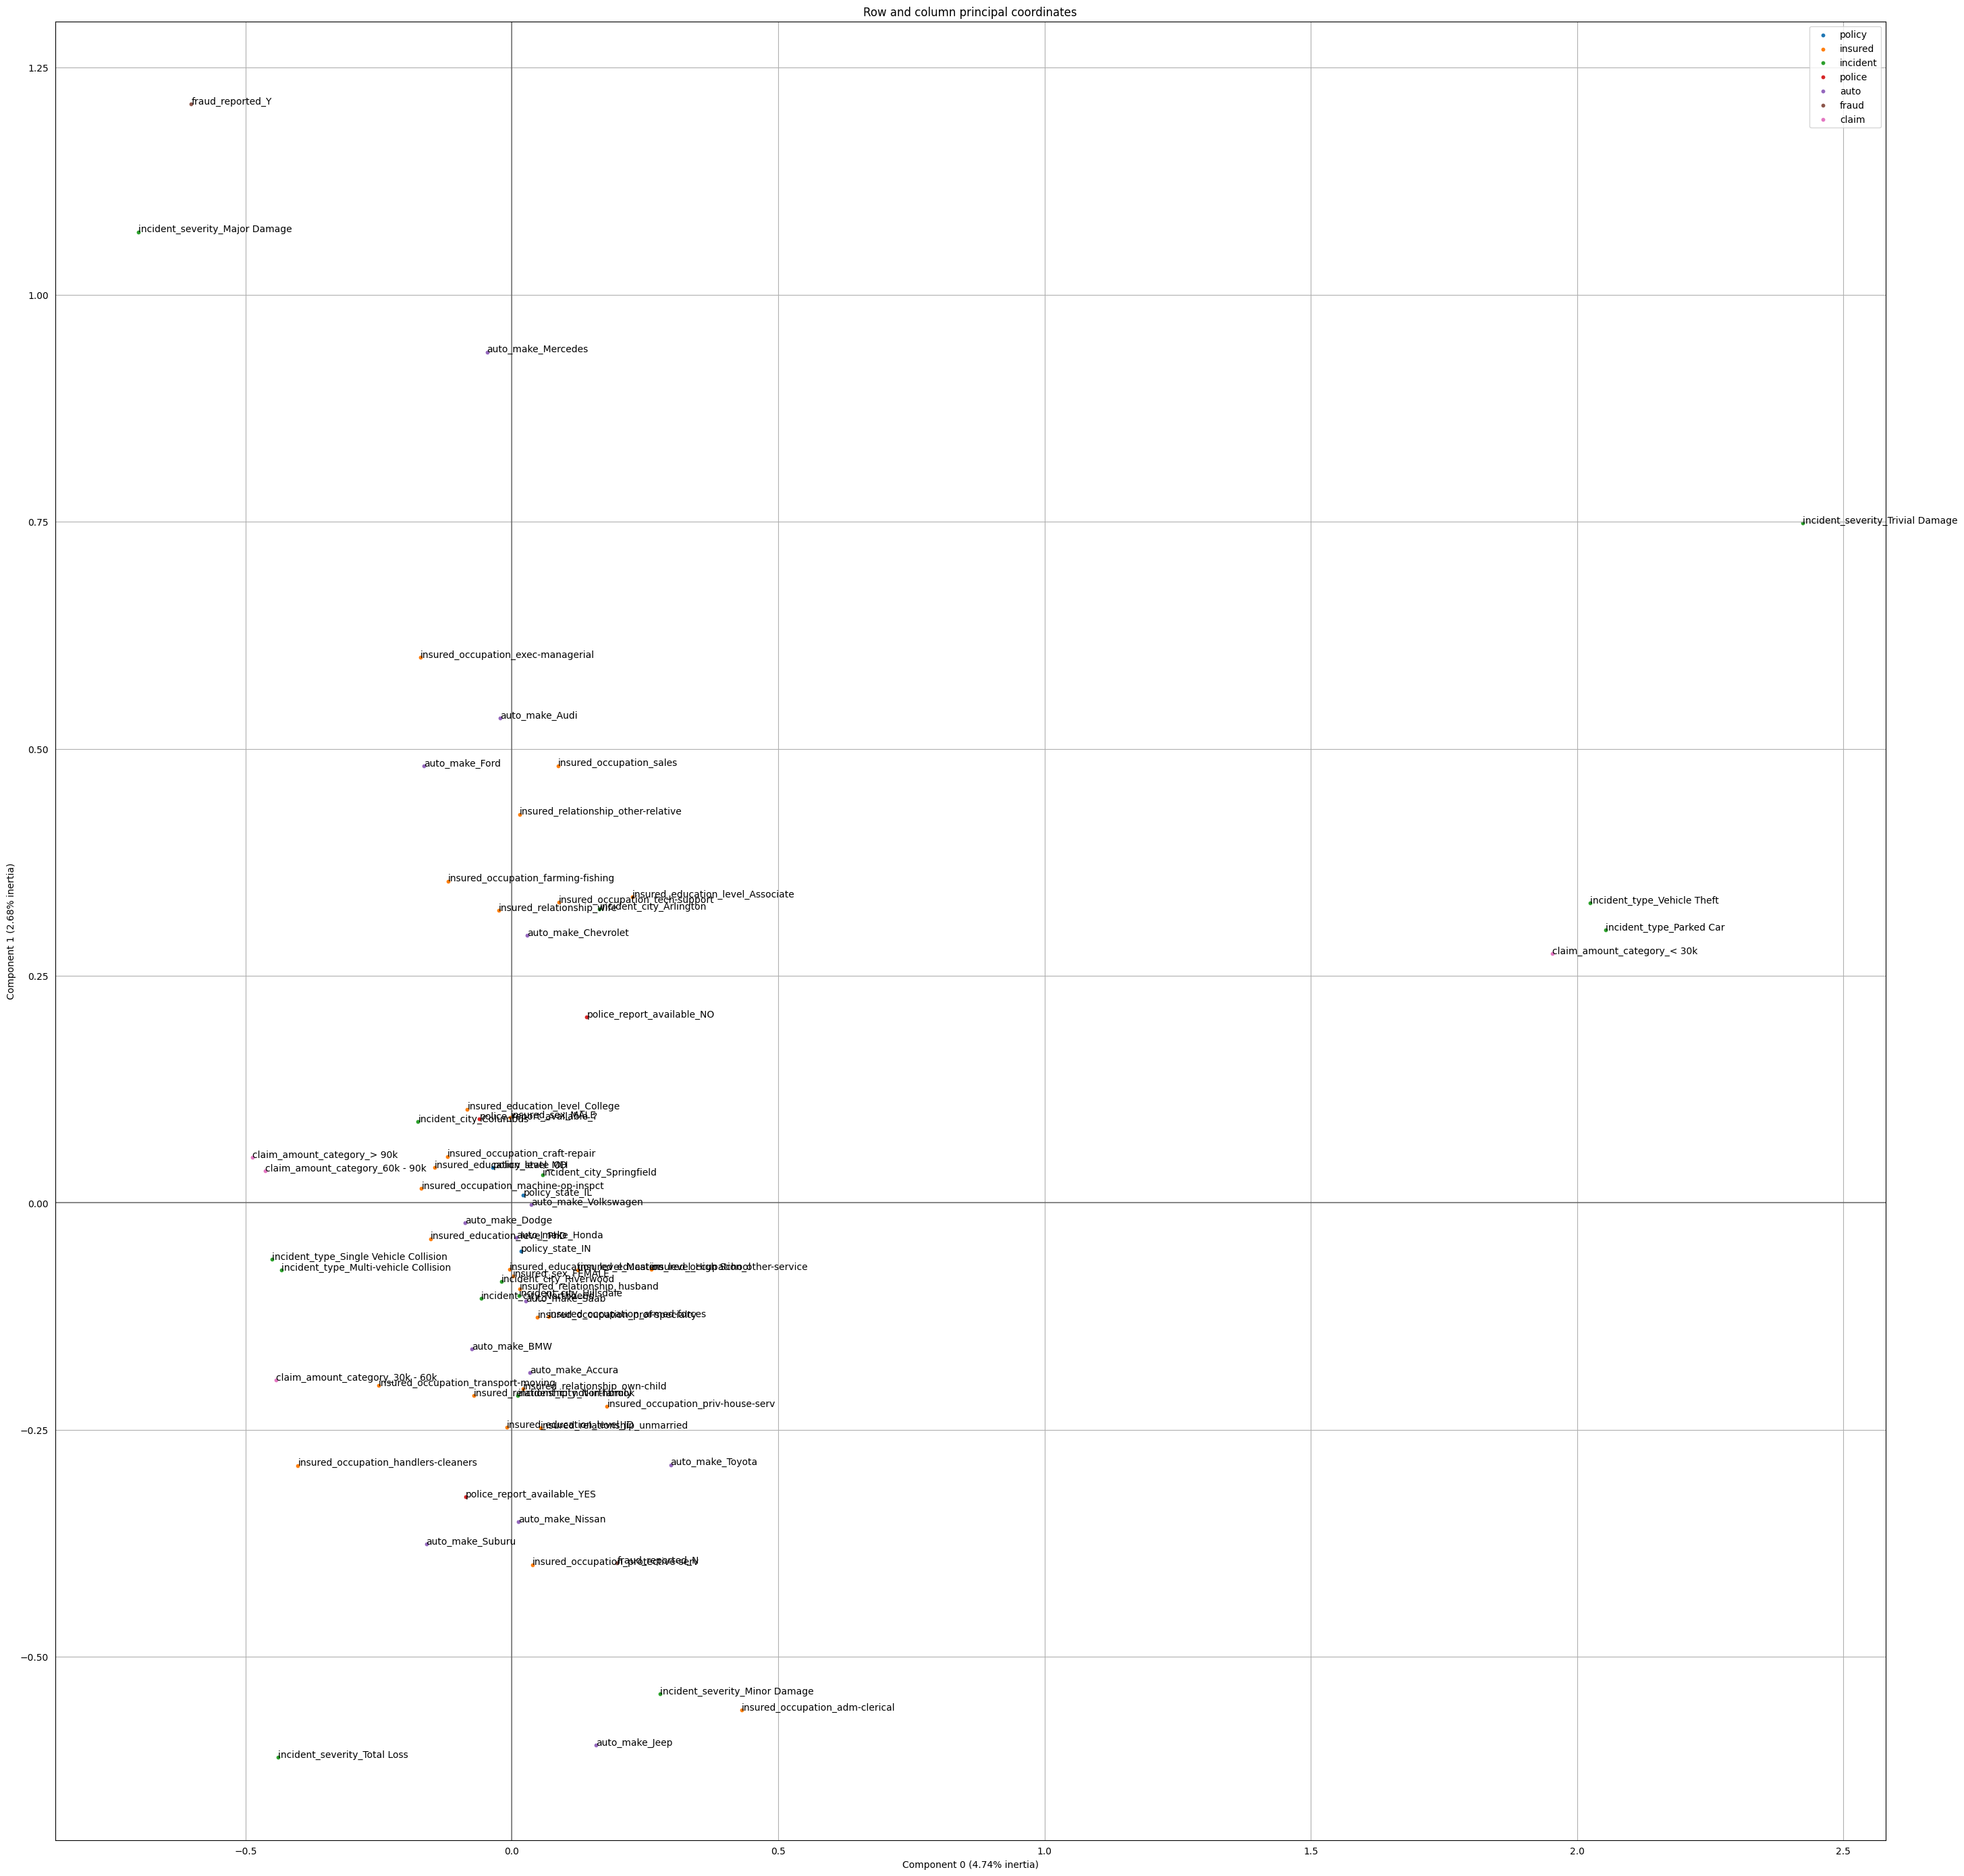

In [13]:
# Création de la figure

fig, ax = plt.subplots(figsize=(35, 35))

#Tracage des axes
ax = plot.stylize_axis(ax)

#Affichage des profils lignes sur deux dimensions
#alpha pour la transparence 
#row_coords = mca.row_coordinates(df)
#ax.scatter(
 #   row_coords.iloc[:, 0],
  #  row_coords.iloc[:, 1],
   # s=10,
    #label=None,
    #color=plot.GRAY['dark'],
    #alpha=0.6
#)

#Profils colonnes
col_coords = mca.column_coordinates(data_acm)
x = col_coords[0]
y = col_coords[1]

#Extraction des préfixes à l'aide map et de lambda
prefixes = col_coords.index.str.split('_').map(lambda x: x[0])

#Affichage des profils colonnes avec leurs modalités
for prefix in prefixes.unique():
    mask = prefixes == prefix
    
    ax.scatter(x[mask], y[mask], s=10, label=prefix)

    for i, label in enumerate(col_coords[mask].index):
        ax.annotate(label, (x[mask][i], y[mask][i]))

#Ajout de légende
ax.legend()
            
            

ax.set_title('Row and column principal coordinates')
ei = [eig / mca.total_inertia_ for eig in mca.eigenvalues_]
ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(0, 100 * ei[0]))
ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(1, 100 * ei[1]))


# interprétations : 
## proximité à l'origine :

-  les modalités 'insured_education_level_PhD', 'auto_make_Dodge','policy_state_IL','insured_relationship_husband' et 'claim_amount_category_60k-90k' sont proches de l'origine, ce qui indique qu'elles sont fréquentes, cela pourrait signifier que ces modalités sont représentatives d'un grand nombre d'individus ou qu'elles ont une occurrence élevée parmi les observations.
- les modalitées 'fraud_reported_Y', 'incident_severity_Major_Damage', 'incident_severity_Trivial_Damage', 'incident_type_vehicle_Theft', 'claim_amount_category_<30k', 'incident_type_parked_Car', ''incident_severity_Total_Loss', sont éloignées de l'origine, Cela suggère qu'elles sont rares dans les données par rapport aux autres modalitées.

## proximité entre les modalitées : 

Dans une analyse des correspondances multiples (ACM), les proximités entre les catégories des différentes variables peuvent indiquer des associations ou des similitudes dans les données. Les approximations que vous avez remarquées suggèrent des associations entre les catégories mentionnées. Voici comment interpréter ces approximations :

1. **'fraud_reported_Y' et 'incident_severity_Major_Damage'** :
   Cette approximation pourrait signifier que les cas de fraude signalés sont plus susceptibles de concerner des accidents graves ou des dommages importants aux véhicules.

2. **'claim_amount_category_<30k' et 'incident_type_parked_Car'** :
   Cette approximation peut indiquer que les réclamations pour des montants plus faibles sont plus susceptibles d'être liées à des accidents survenus lorsque le véhicule était stationné, ce qui pourrait inclure des incidents tels que des coups de portière ou des accrochages dans un parking.

3. **'incident_city_Northbrook' et 'auto_make_BMW' et 'insured_relationship_own-child'** :
   Cette approximation  pourrait indiquer que dans la ville de Northbrook, les accidents impliquant des voitures de marque BMW sont plus susceptibles de concerner des assurés qui sont des enfants du titulaire de la police. Cela pourrait potentiellement refléter des caractéristiques démographiques ou des schémas de conduite spécifiques à cette région et à ce groupe d'assurés.

## les dimensions :

- les modalitées 'claim_amount_category_<30k', 'incident_type_parked_Car' et 'incident_type_Vehicle_Theft' sont plus importantes dans la définition de la première dimension.
Tandis que pour la deuxième dimension les modalités qui contribuent au plus sont "auto_make_Mercedes", "fraud_reported_Y" et "incident_severity_Major_Damage"

## l'inertie : 
- les pourcentage dans les axes sont faibles car on a beaucoups de modalitées.

In [14]:
#résumer les valeurs propres (eigenvalues) obtenues à partir d'une ACM en utilisant la méthode des valeurs singulières
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.229,4.74%,4.74%
1,0.130,2.68%,7.42%


ces chiffres indiquent la contribution de chaque composante principale à l'explication de la variation des données dans l'analyse des correspondances multiples (ACM).

- La première composante principale explique environ 4.74% de la variation totale des données, ce qui en fait une composante significative dans la capture de la structure des données.
  
- La deuxième composante principale explique environ 2.68% de la variation totale, ce qui représente une part moins importante de la variation mais qui contribue également à la compréhension de la structure des données.

Ces pourcentages cumulés montrent que les deux premières composantes principales combinées expliquent environ 7.42% de la variation totale, ce qui indique que la majorité de la variation des données reste à expliquer, mais que les premières composantes principales sont importantes pour comprendre la structure des données.

## Contributions des modalitées dans la définition de chaque composante

### composante 0

In [15]:
sorted_contributions_0 = mca.column_contributions_.sort_values(by=0, ascending=False)
sorted_contributions_0.head().style.format('{:.0%}')

,0,1
claim_amount_category_< 30k,26%,1%
incident_severity_Trivial Damage,19%,3%
incident_type_Vehicle Theft,14%,1%
incident_type_Parked Car,13%,0%
incident_severity_Major Damage,5%,20%


### Composante 1 

In [16]:
sorted_contributions_1 = mca.column_contributions_.sort_values(by=1, ascending=False)
sorted_contributions_1.head().style.format('{:.0%}')

,0,1
fraud_reported_Y,3%,23%
incident_severity_Major Damage,5%,20%
fraud_reported_N,1%,8%
incident_severity_Total Loss,2%,7%
incident_severity_Minor Damage,1%,7%


 Les pourcentages de contribution pour les deux premières composantes principales indiquent l'importance des catégories de variables dans la capture de la variation des données dans l'analyse des correspondances multiples (ACM).

- Pour la première composante principale (0), les catégories qui contribuent le plus sont :
  - `claim_amount_category_< 30k` avec 26% : Cette catégorie est fortement associée à la première composante principale.
  - `incident_severity_Trivial Damage` avec 19% : Cette catégorie contribue également de manière significative à la première composante principale.

- Pour la deuxième composante principale (1), les catégories qui contribuent le plus sont :
    -  `fraud_reported_Y` avec 23% : Cette catégorie est fortement associée à la deuxième composante principale.
  - `incident_severity_Major Damage` avec 20% : Cette catégorie contribue également de manière signific

En résumé, ces pourcentages de contribution indiquent quelles catégories de variables ont le plus d'impact sur chaque composante principale, ce qui nous aide à comprendre les dimensions principales qui structurent les données dans l'analyse ACM.
